In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('EmploymentLogs_3-1_5-2.csv')

# 显示前5行数据
print(df.head())

                   timestamp  participantId  jobId
0  2022-03-01 00:00:00+00:00              0    254
1  2022-03-01 00:00:00+00:00              1    929
2  2022-03-01 00:00:00+00:00              2    348
3  2022-03-01 00:00:00+00:00              3    316
4  2022-03-01 00:00:00+00:00              4    177


In [4]:
# 输出数据的行数和列数
print(df.shape)

(17472901, 3)


In [3]:
# 根据jobId分组，统计每个jobId的记录数

# 方法1
print(df.groupby('jobId').size())


jobId
1       19674
4       19675
5       19675
6       19675
7       19675
        ...  
1322    19675
1323    19675
1324    19674
1325     1225
1326    19674
Length: 1190, dtype: int64


In [5]:
# 读取'Attributes/Jobs.csv'文件
df2 = pd.read_csv('Attributes/Jobs.csv')

# 根据df2建立一个字典，key为df2[jobId]，value为df2[employerId]
job_employer_dict = dict(zip(df2['jobId'], df2['employerId']))




In [6]:
# 根据job_employer_dict, 为df添加一列employerId
df['employerId'] = df['jobId'].map(job_employer_dict)

In [9]:
# 根据employerId分组，统计每个employerId下，不同的jobId的记录数，并按记录数降序排列
df_jobs_employerId = df.groupby('employerId')['jobId'].nunique().sort_values(ascending=False)

# 将jobId列名改为job_count
df_jobs_employerId = df_jobs_employerId.rename('job_count')

# 保存结果到文件
df_jobs_employerId.to_csv('df_jobs_employerId.csv', header=True)



In [10]:
# 分析df_jobs_employerId中jobs_count的分布
print(df_jobs_employerId.describe())

count    252.000000
mean       4.722222
std        2.071006
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: job_count, dtype: float64


job_count
2    46
5    45
3    38
4    35
6    31
7    28
8    16
9    12
1     1
Name: count, dtype: int64


<Axes: ylabel='count'>

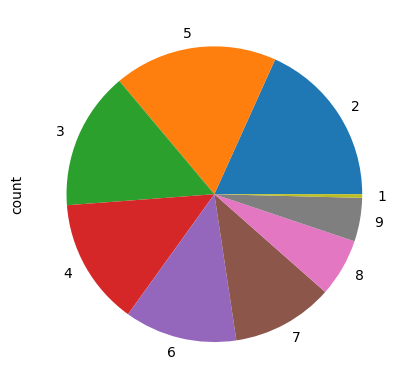

In [12]:
# 统计每个jobs_count下的employerId的数量, 并画成饼图
df_jobs_employerId_count = df_jobs_employerId.value_counts()
print(df_jobs_employerId_count)

df_jobs_employerId_count.plot.pie()